In [80]:
import pandas as pd


data = pd.read_excel("./Train_dataset.xlsx")

In [81]:
print(data.head())

         Time    Power
0  20180101_0  105.760
1  20180101_1  104.944
2  20180101_2  105.552
3  20180101_3  108.512
4  20180101_4  102.896


최대 사용 전력 : 2858.112000000081
최소 사용 전력 : 0.0
평균 사용 전력 : 133.29621772860233
표준편차 사용 전력 : 70.86112146862948
1분위 사용 전력 : 90.67200000002049
3분위 사용 전력 : 152.975999999966


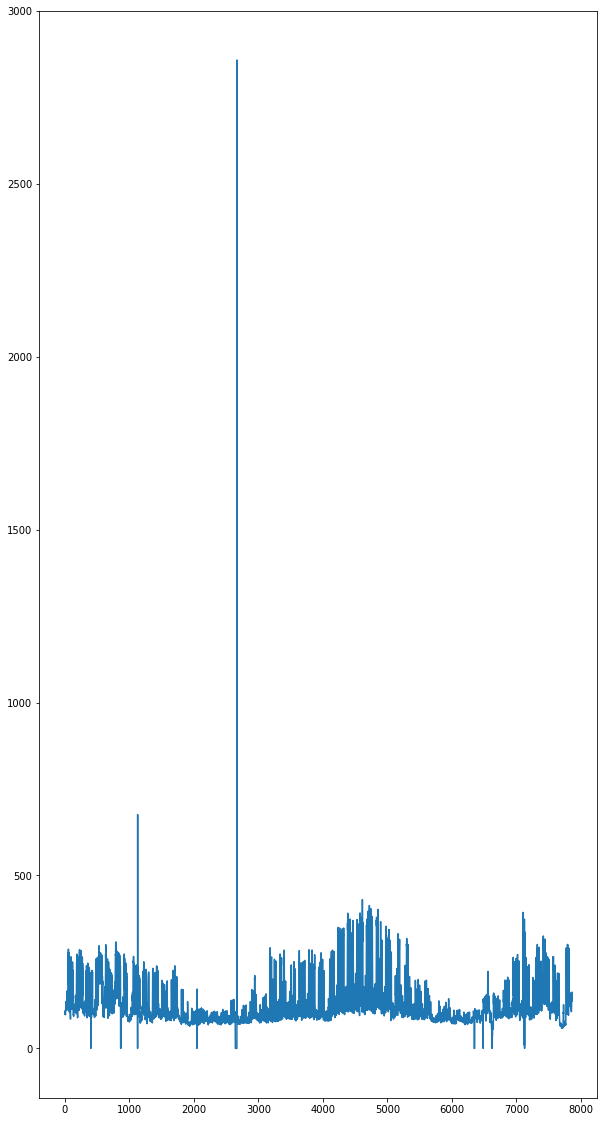

In [82]:
import matplotlib.pyplot as plt
import numpy as np

#전력량 특징 확인
print('최대 사용 전력 : {}'.format(data['Power'].max()))
print('최소 사용 전력 : {}'.format(data['Power'].min()))
print('평균 사용 전력 : {}'.format(data['Power'].mean()))
print('표준편차 사용 전력 : {}'.format(data['Power'].std()))
print('1분위 사용 전력 : {}'.format(np.percentile(data['Power'], 25)))
print('3분위 사용 전력 : {}'.format(np.percentile(data['Power'], 75)))

#전력량 그래프 확인
plt.figure(figsize=(10,20))
plt.plot(data['Power'])

In [83]:
#Time을 월, 주, 년, 일로 변환하여 column에 추가함
data['Time'] = pd.to_datetime(data['Time'], format='%Y%m%d_%H')
data["Month"] = pd.to_datetime(data["Time"]).dt.month
data['Week'] = data['Time'].dt.strftime('%U')
data['Week'] = data['Week'].astype(int)
data['Year'] = data['Time'].dt.year
data['Day'] = ((data['Time'] - pd.to_datetime(data['Year'].astype(str), format='%Y')) / pd.Timedelta(days=1) + 1).astype(int)

#이상치를 계절별로 처리하기 위하여 계절 column을 추가함
data.loc[(data["Month"] == 12) | (data["Month"] <= 2), "Season"] = "winter"
data.loc[(data["Month"] >= 3) & (data["Month"] <= 5), "Season"] = "spring"
data.loc[(data["Month"] >= 6) & (data["Month"] <= 8), "Season"] = "summer"
data.loc[(data["Month"] >= 9) & (data["Month"] <= 11), "Season"] = "autumn"

In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#학습 모델 생성
model = LinearRegression()

#시간을 숫자로 변환
data["Time"] = (data["Time"] - data["Time"].iloc[0]).dt.total_seconds() / 3600

X = data[["Time", "Season", "Month", "Week"]]
X = pd.concat([X.drop('Season', axis=1), pd.get_dummies(X['Season'])], axis=1)

Y = data["Power"]

X_train, X_test, y_train, y_test = train_test_split(X, Y)

#모델 학습
model.fit(X_train, y_train)

#모델 점수
print("test set score :", model.score(X_test, y_test))

test set score : 0.2621503439905628
